# TUGAS PREPROCESSING 

## 1. a. Membaca Data produk_elektronik.csv

In [12]:
import pandas as pd
import numpy as np

data = pd.read_csv('data/produk_elektronik.csv')
print(data)


     produk_id nama_produk    kategori  harga  rating  jumlah_ulasan  \
0            1    Produk_1  Smartwatch  746.0     4.2          273.0   
1            2    Produk_2   Headphone  241.0     3.5          239.0   
2            3    Produk_3      Tablet  810.0     3.8          209.0   
3            4    Produk_4   Headphone  303.0     3.2           59.0   
4            5    Produk_5   Headphone  252.0     3.7           76.0   
..         ...         ...         ...    ...     ...            ...   
545        546  Produk_546      Laptop  496.0     3.9           19.0   
546        547  Produk_547   Headphone  628.0     4.7          414.0   
547        548  Produk_548      Tablet  465.0     4.3          393.0   
548        549  Produk_549      Laptop  495.0     3.1          311.0   
549        550  Produk_550      Tablet  388.0     4.3          240.0   

     negara_asal  
0          Japan  
1         Canada  
2         Canada  
3    South Korea  
4    South Korea  
..           ...  
54

##      b. Menampilkan informasi dataset

In [13]:
data.info()

print("\n Mendeteksi missing value")
data.isnull()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   produk_id      550 non-null    int64  
 1   nama_produk    550 non-null    object 
 2   kategori       550 non-null    object 
 3   harga          520 non-null    float64
 4   rating         500 non-null    float64
 5   jumlah_ulasan  530 non-null    float64
 6   negara_asal    550 non-null    object 
dtypes: float64(3), int64(1), object(3)
memory usage: 30.2+ KB

 Mendeteksi missing value


,produk_id,nama_produk,kategori,harga,rating,jumlah_ulasan,negara_asal
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
545,False,False,False,False,False,False,False
546,False,False,False,False,False,False,False
547,False,False,False,False,False,False,False
548,False,False,False,False,False,False,False


## 2. a. Mengecek missing value pada data

In [14]:
print("\n Menghitung jumlah missing value pada setiap kolom")
np.sum(data.isnull())


 Menghitung jumlah missing value pada setiap kolom


c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\_core\fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


produk_id         0
nama_produk       0
kategori          0
harga            30
rating           50
jumlah_ulasan    20
negara_asal       0
dtype: int64

## b. Kenapa missing value dapat memengaruhi hasil analisis data

Missing value dapat mempengaruhi analisis dan hasil yang akan diperoleh. Keberadaan data yang hilang dapat mengurangi akurasi analisis karena informasi yang tidak lengkap dapat menyebabkan bias dalam perhitungan statistik seperti rata-rata, median, dan standar deviasi. Selain itu, banyak algoritma dan metode statistik tidak dapat bekerja dengan baik jika terdapat nilai yang hilang, sehingga dapat menghambat proses analisis data. Kehilangan data juga dapat menyebabkan distorsi dalam hasil statistik, misalnya jika banyak data penting yang hilang, maka kesimpulan yang diambil dari analisis bisa keliru.

## c. Metode untuk menangani missing value

Untuk menangani missing value kita bisa menggunakan metode imputation untuk mengisi data hilang dengan data mean, median atau modus tergantung jenis data dan karakteristiknya.

## d. Menangani missing value

data harga

In [15]:
data["harga"] = data["harga"].fillna(data.groupby("kategori")["harga"].transform("median"))
np.sum(data['harga'].isnull())

np.int64(0)

data rating

In [16]:
data["rating"] = data["rating"].fillna(data.groupby("kategori")["rating"].transform("median"))
np.sum(data['rating'].isnull())

np.int64(0)

data jumlah_ulasan

In [17]:
data["jumlah_ulasan"] = data["jumlah_ulasan"].fillna(data.groupby(["kategori"])["jumlah_ulasan"].transform("median"))
np.sum(data['jumlah_ulasan'].isnull())

np.int64(0)

In [18]:
np.sum(data.isnull())

c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\_core\fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


produk_id        0
nama_produk      0
kategori         0
harga            0
rating           0
jumlah_ulasan    0
negara_asal      0
dtype: int64

## 3. a. Mengidenfikasi outlier dalam datases

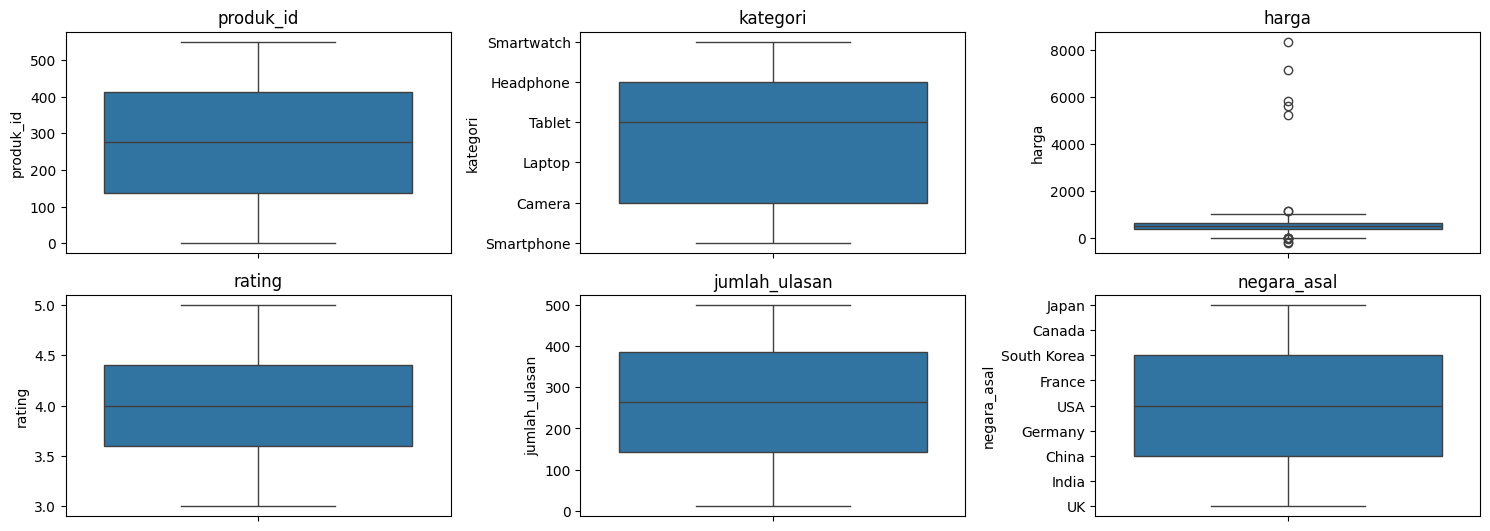

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualisasi Boxplot
plt.figure(figsize=(15, 8))
for i, col in enumerate(data.columns.drop("nama_produk"), 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=data[col])
    plt.title(col)
plt.tight_layout()
plt.show()


## b. Apa dampak dari keberadaan outlier terhadap analisis?

Outlier dapat mendistorsi statistik seperti mean dan regresi, menyebabkan hasil analisis kurang akurat. Mereka juga bisa mempengaruhi model prediktif, meningkatkan risiko overfitting atau kesalahan prediksi. Oleh karena itu, penting untuk mengidentifikasi dan menanganinya dengan metode yang sesuai.

## c. Memilih metode untuk menangani outlier

Untuk menangani outlier menggunakan metode winsorizing, yaitu menggantinilai persentil tertentu. Metode ini dipilih karena tetap mempetehankan semua data dalam analisis tanpa menghapusnya, sehingga data tidak terdistorsi. Selain itu, winsorizing juga mengurangi pengaruh ekstream tanpa menghilangkan variasi penting dalam data. 

## d. Tangani outlier dengan metode yang sesuai, atau jika memilih tidak menangani outlier berikan alasannya

Data yang memiliki outlier hanya data harga, sehingga tidak perlu ditangani.

In [20]:
Q1 = data["harga"].quantile(0.25) 
Q3 = data["harga"].quantile(0.75)  
IQR = Q3 - Q1  
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(data[data["harga"]>upper_bound])

     produk_id nama_produk    kategori   harga  rating  jumlah_ulasan  \
29          30   Produk_30      Tablet  1150.0     3.1          486.0   
116        117  Produk_117  Smartphone  8341.0     4.6          300.0   
233        234  Produk_234      Tablet  7123.0     3.4          389.0   
320        321  Produk_321      Tablet  1134.0     3.2          138.0   
363        364  Produk_364  Smartphone  5840.0     4.4          492.0   
413        414  Produk_414      Laptop  5598.0     4.3          387.0   
483        484  Produk_484      Camera  5224.0     4.1          212.0   

     negara_asal  
29            UK  
116  South Korea  
233           UK  
320       France  
363       Canada  
413  South Korea  
483       Canada  


Dari data yang memiliki harga diatas upper bound bisa diasumsikan bahwa barang tersebut adalah barang mewah sehingga memiliki harga yang diatas harga wajar

## 4. a. Menentukan kolom yang perlu di encoding

In [21]:
print("data negara: ",data["negara_asal"].unique())
print("data kategori: ",data["kategori"].unique())

data negara:  ['Japan' 'Canada' 'South Korea' 'France' 'USA' 'Germany' 'China' 'India'
 'UK']
data kategori:  ['Smartwatch' 'Headphone' 'Tablet' 'Laptop' 'Camera' 'Smartphone']


untuk data yang perlu diencoding adalah data kategori dan data negara asal karena bersifat kategorik